#### Chargement des données

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [2]:
sondage = pd.read_csv('sondage.csv',delimiter=',')

Prenons un bref apercu des données issues du sondage 

In [3]:
sondage.head()

,Horodateur,Question 1 : Quelle est votre tranche d'âge ?,Question 2 : Quelle langue utilisez-vous au quotidien ?,Question 3 : Vous arrive-t-il de consulter des sites internet conçus/traduits dans des langues autres que votre langue de prédilection ?,Question 3 : Quel intérêt accordez-vous à votre langue maternelle,Question 4 : Parlez-vous votre langue maternelle ?,Question 5 : Quelle est votre fréquence d'utilisation de votre langue maternelle ?,Question 6 : Seriez-vous ouvert(e)s à de nouvelles méthodes d'apprentissage de votre langue maternelle basées sur vos activités favorites ?,Question 7 : Aimeriez-vous que vos sites internet préférés possèdent également une version traduite en votre langue maternelle ?,Question 8 : Le fait que vos sites internet préférés soient traduits en votre langue maternelle pourrait-il vous pousser à les consulter plus souvent ?,Question 9 : Avez-vous des suggestions pour promouvoir les langues maternelles dans l'univers numérique ?
0,16/12/2019 00:41:23,20-25 ans,Français,Oui,Moyen,Non,Nulle,Oui,Oui,Oui,Non
1,16/12/2019 00:50:37,25-30 ans,Français,Oui,Moyen,Oui,Quotidienne,Oui,Oui,Oui,NaN
2,16/12/2019 00:58:22,25-30 ans,Français,Oui,Elevé,Oui,Occasionnelle,Oui,Oui,Oui,NaN
3,16/12/2019 01:01:56,20-25 ans,Français,Non,Elevé,Oui,Occasionnelle,Oui,Oui,Oui,Que les concepteurs des programmes informatiqu...
4,16/12/2019 01:02:02,20-25 ans,Français,Oui,Faible,Non,Nulle,Oui,Oui,Non,NaN


#### Nettoyage des données

Les noms des colonnes sont trop longues et peuvent être résumées; de plus l'heure à laquelle un individu a répondu n'est pas significatif pour cette analyse nous allons donc la supprimer

In [4]:
# Renommer la colonne 
sondage = sondage.drop(columns = 'Horodateur')

- Question 1 : tranche_age
- Question 2 : langue
- Question 3 : site_etranger
- Question 4 : interet 
- Question 5 : parlez_vous
- Question 6 : frequence
- Question 7 : apprentissage
- Question 8 : site_en_langue 
- Question 9 : plus_attractif

In [7]:
sondage.columns = ['tranche_age','langue','site_etranger','interet','parlez_vous','frequence','apprentissage','site_en_langue','plus_attractif','suggestion']
sondage = sondage.drop(columns = 'suggestion')

In [10]:
sondage = sondage.dropna()

In [11]:
sondage.head()

,tranche_age,langue,site_etranger,interet,parlez_vous,frequence,apprentissage,site_en_langue,plus_attractif
0,20-25 ans,Français,Oui,Moyen,Non,Nulle,Oui,Oui,Oui
1,25-30 ans,Français,Oui,Moyen,Oui,Quotidienne,Oui,Oui,Oui
2,25-30 ans,Français,Oui,Elevé,Oui,Occasionnelle,Oui,Oui,Oui
3,20-25 ans,Français,Non,Elevé,Oui,Occasionnelle,Oui,Oui,Oui
4,20-25 ans,Français,Oui,Faible,Non,Nulle,Oui,Oui,Non


#### Statistiques descriptives des données 

In [14]:
sondage.describe()

,tranche_age,langue,site_etranger,interet,parlez_vous,frequence,apprentissage,site_en_langue,plus_attractif
count,73,73,73,73,73,73,73,73,73
unique,5,3,2,4,2,4,2,2,2
top,20-25 ans,Français,Oui,Elevé,Oui,Occasionnelle,Oui,Oui,Oui
freq,40,66,64,37,38,30,70,59,50


Interpretation : Ce tableau nous permet de savoir que *40%* de notre population sont dans la tranche 20-25 ans. *66%* parlent francais au quotidien, et *64%* ont pour habitude de consulter des sites en d'autres langue. Mais seulement *38%* parlent leur langue maternelle. Il ressort également que *50%* pense que la traduction en langue peuvent augmenter leur intérêt pour un site. 

In [35]:
str(round( (sondage[sondage.interet == 'Elevé'].shape[0]+sondage[sondage.interet == 'Moyen'].shape[0])*100 / sondage.shape[0],2)) + ' %'

'79.45 %'

Interpretation : Ce résultat nous permet de savoir que près de 80% ont un interêt au moins moyen pour la langue maternelle.

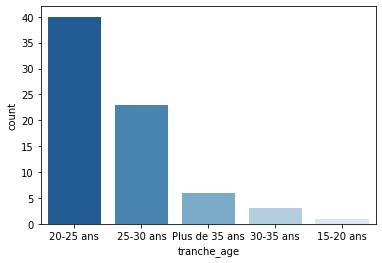

In [41]:
sns.countplot(x='tranche_age',data=sondage,palette='Blues_r')

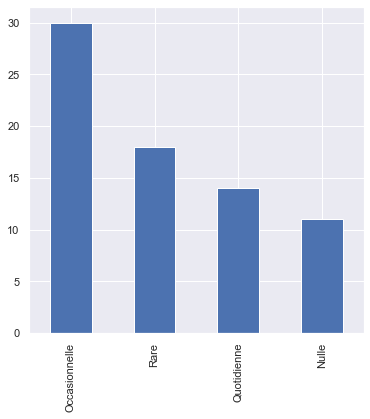

In [80]:
sondage.frequence.value_counts().plot(kind='bar',figsize=(6, 6))

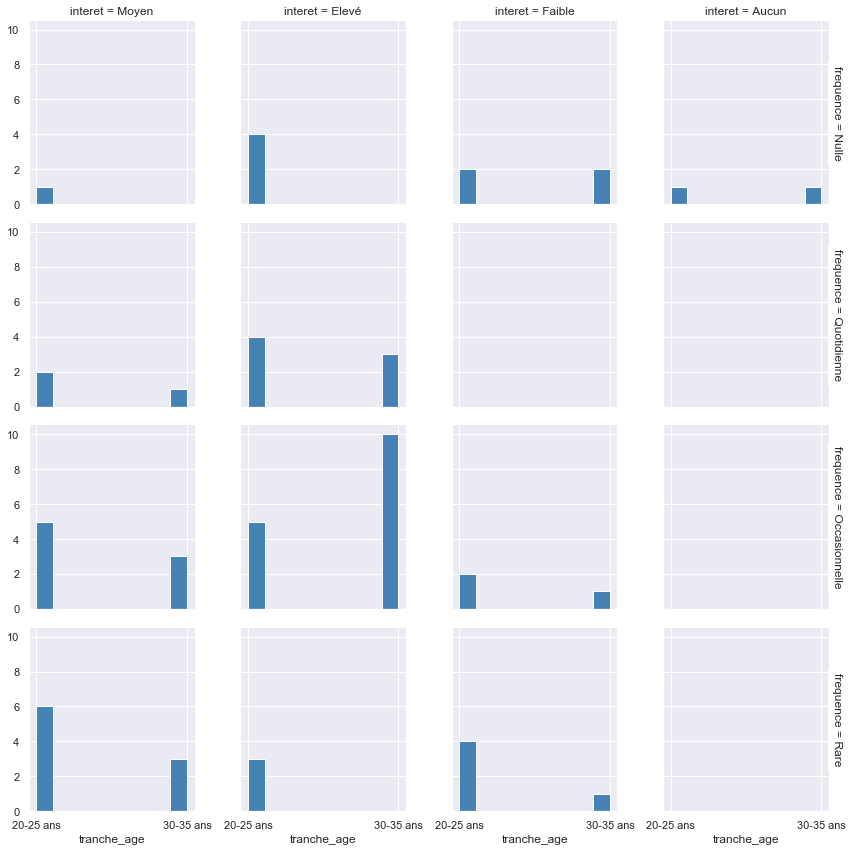

In [79]:
sns.set(style="darkgrid")
g = sns.FacetGrid(sondage, row="frequence", col="interet", margin_titles=True)
bins = np.linspace(0, 1, 10)
g.map(plt.hist, "tranche_age", color="steelblue", bins=bins)

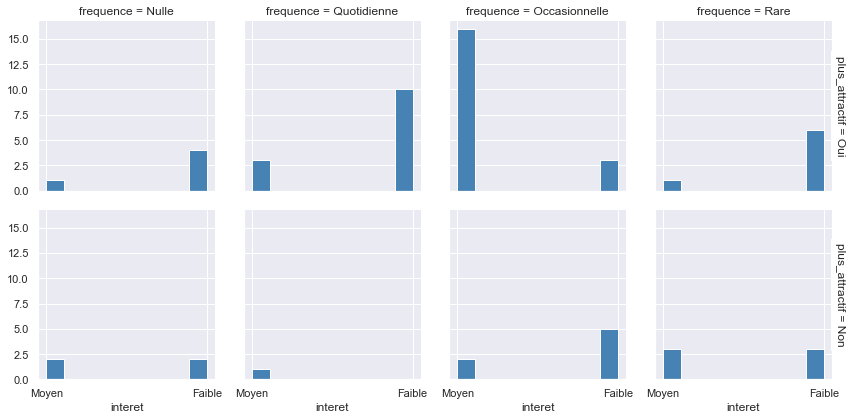

In [86]:
sns.set(style="darkgrid")
g = sns.FacetGrid(sondage, col="frequence", row="plus_attractif", margin_titles=True)
bins = np.linspace(0, 1, 10)
g.map(plt.hist, "interet", color="steelblue", bins=bins)